# Step 0. Definition

In [25]:
#import dtnmonitor_v2 as dtn
import dtn_module.dtnmonitor_v3  as DtnModule
import os,sys
import getpass
import subprocess

dtn = DtnModule.DTNMonitor()

user=getpass.getuser()

DtnModule.show_interface()

DtnModule.show_nvme()

## this is necessary to show exec info in notebook
def exec_print(command):
    process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
    for line in iter(process.stdout.readline, b''):
        # system print
        sys.stdout.write(line)   

Network Interface                        IP                   
lo                                       127.0.0.1            
enp21s0                                  165.124.3.75         
ens1f0                                   192.168.1.2          
ens4f0.2038                              10.250.38.52         
ens4f0.3064                              192.168.64.52        
ens4f1.3065                              192.168.65.52        
docker0                                  172.17.0.1           
Disk mountpoint                     size     avail   used%  
/dev                                126G     126G    0%     
/run                                26G      26G     1%     
/                                   28G      18G     32%    
/dev/shm                            126G     126G    1%     
/run/lock                           5.0M     5.0M    0%     
/sys/fs/cgroup                      126G     126G    0%     
/home                               190G     162G    15%    
/run/use

# Step 1. Parameter Setting

In [26]:

### P5.  SELECT THE MONITOR NETWORK INTERFACE  ###
## used in Step 4 , if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
dtn.interface = 'all'
#dtn.interface = 'eth1'
#dtn.interface = 'all'

### P4. SELECT OUTPUT FILE , 
### used in Step 3 : nuttcp write file , the file number decides the amount of network flow threads 
file_nuttcp=[
"/data/disk0/sc17/fftest",
"/data/disk1/sc17/fftest",
"/data/disk2/sc17/fftest",
"/data/disk3/sc17/fftest",
"/data/disk4/sc17/fftest",
"/data/disk5/sc17/fftest",
"/data/disk6/sc17/fftest",
"/data/disk7/sc17/fftest",
    # "/foo/bar/filennn"
     ]

# file2_write_nuttcp=[
# "/data/disk0/sc17/w31",
# "/data/disk1/sc17/w32",
# "/data/disk2/sc17/w33",
# "/data/disk3/sc17/w34",
# "/data/disk4/sc17/w35",
# "/data/disk5/sc17/w36",
# "/data/disk6/sc17/w37",
# "/data/disk7/sc17/w38",
#     # "/foo/bar/filennn"
#      ]



## used in Step 2 :input threads number
count = len(file_write_nuttcp)

# Step 2. Start servers for network transfer by disk

In [27]:

for i in range(count):
    command = "nuttcp -S -1 -sdz -P 5300"+str(i)+" -p 5310"+str(i)+ " < "+ file_nuttcp[i] +" & "
    os.system(command)
    print(command)
#     command = "nuttcp -S -1 -sdz -P 5320"+str(i)+" -p 5330"+str(i)+ " > "+ file2_write_nuttcp[i] +" & "
#     print(command)
#     os.system(command)
    #dtn.exec_sysout(command)



nuttcp -S -1 -sdz -P 53000 -p 53100 < /data/disk0/sc17/fftest & 
nuttcp -S -1 -sdz -P 53001 -p 53101 < /data/disk1/sc17/fftest & 
nuttcp -S -1 -sdz -P 53002 -p 53102 < /data/disk2/sc17/fftest & 
nuttcp -S -1 -sdz -P 53003 -p 53103 < /data/disk3/sc17/fftest & 
nuttcp -S -1 -sdz -P 53004 -p 53104 < /data/disk4/sc17/fftest & 
nuttcp -S -1 -sdz -P 53005 -p 53105 < /data/disk5/sc17/fftest & 
nuttcp -S -1 -sdz -P 53006 -p 53106 < /data/disk6/sc17/fftest & 
nuttcp -S -1 -sdz -P 53007 -p 53107 < /data/disk7/sc17/fftest & 


# Step 3. Start Monitor

In [28]:
exec_print("sleep 3; ps -u "+ user +" ux |grep nuttcp")

root     18126  0.0  0.0   4560   168 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53000 -p 53100
root     18129  0.0  0.0   4560   172 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53001 -p 53101
root     18132  0.0  0.0   4560   168 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53002 -p 53102
root     18135  0.0  0.0   4560   172 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53003 -p 53103
root     18138  0.0  0.0   4560   168 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53004 -p 53104
root     18141  0.0  0.0   4560   172 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53005 -p 53105
root     18144  0.0  0.0   4560   172 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53006 -p 53106
root     18147  0.0  0.0   4560   172 ?        Ss   09:53   0:00 nuttcp -S -1 -sdz -P 53007 -p 53107
root     18178  0.3  0.0   4500   704 ?        S    09:53   0:00 /bin/sh -c sleep 3; ps -u root ux |grep nuttcp
root     18181  0.0  0.0  14220  1032 ?        S    09:53   0:00 grep nuttcp


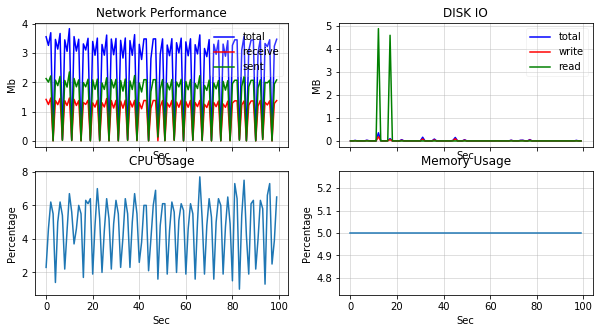

In [29]:
dtn.run_monitor(timeout=None)

# Step A . stop the test nuttcp

In [24]:
dtn.stop()

exec_print("pkill nuttcp")

exec_print("sleep 3; ps -u "+ user +" ux |grep nuttcp")

root     18088  0.3  0.0   4500   736 ?        S    09:53   0:00 /bin/sh -c sleep 3; ps -u root ux |grep nuttcp
root     18091  0.0  0.0  14220  1092 ?        S    09:53   0:00 grep nuttcp
